# High Dimensional RNA-Seq Data Set

### Dimensionality Reduction for Visualization and  Tumor Classification

This dataset is from the UCI Machine Learning repository. This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. There are 801 instances with 20531 attributes.

Samples (instances) are stored row-wise. Variables (attributes) of each sample are RNA-Seq gene expression levels measured by illumina HiSeq platform.

A dummy name (gene_XX) is given to each attribute.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE,MDS
import seaborn as sns
import warnings

import umap.umap_ as umap

warnings.filterwarnings('ignore')

## 1. Read data

In [2]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [4]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


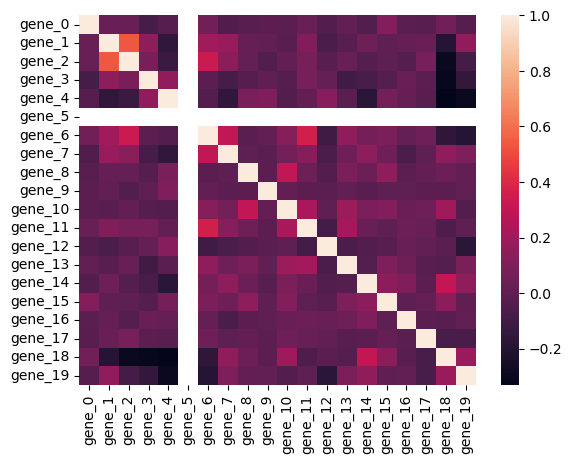

In [5]:
#correlation plot of a subset of the data
data_sample = data.iloc[1:1000, 0:21]
data_sample.head()
sns.heatmap(data_sample.corr(numeric_only=True));

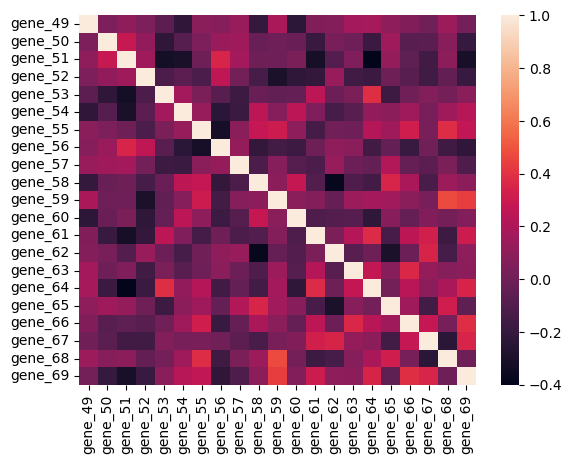

In [6]:
#correlation plot of a subset of the data
data_sample = data.iloc[1:1000, 50:71]
data_sample.head()
sns.heatmap(data_sample.corr());

### Rename data frames, drop sample names

In [7]:
X = data.drop(data.columns[0],axis=1)
Y = labels.Class

## 2. Dimensionality Reduction

Here, over 20,000 genes have been reduced to two dimensions for visualization. 

In single-cell RNA sequencing (RNA-seq) one often wishes to reduce high-dimensional expression data to a 2D plot, such that cells with similar transcriptomes appear close together. Here, besides PCA and MDS, t-distributed stochastic neighbor embedding (t-SNE) and uniform manifold approximation and projection (UMAP) have become methods of choice

### PCA

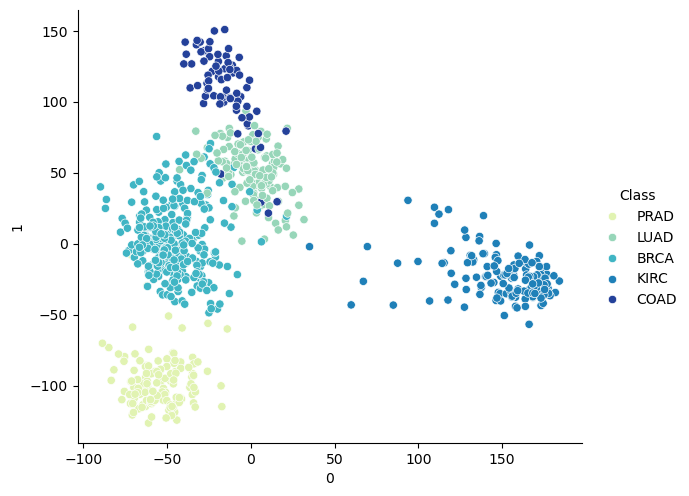

In [8]:
X_pca = PCA(n_components=5).fit_transform(X)
X_pca = pd.DataFrame(data = X_pca)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="Class",palette="YlGnBu",size=5,aspect=1.2)
pl.show()

### Kernel PCA

### MDS

### T-SNE 

### UMAP 

## 3. Train classification model

### Using UMAP-transformed data, separate into train and test set

Using only 2 dimensions of data to perform machine learning

In [ ]:
X_ = X_umap.drop(['Class'],axis=1)
Y_ = X_umap['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size = 0.25, random_state = 10)

In [ ]:
X_train.shape

### Train linear SVM model

In [ ]:
lsvc_model = SVC(kernel = 'linear', random_state = 10)
lsvc_model.fit(X_train, Y_train) 
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

### Conclusion